<a href="https://colab.research.google.com/github/rprtr258/data-science/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Load dataset and select 50 objects
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fuck_of_the_fuck = ["Iris-virginica", "Iris-versicolor"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length", "sepal width", "petal length", "petal width", "class"])
df = df[(df["class"] == fuck_of_the_fuck[0]) | (df["class"] == fuck_of_the_fuck[1])]
class1 = df[df["class"] == fuck_of_the_fuck[0]].sample(frac=1, random_state=1)
class2 = df[df["class"] == fuck_of_the_fuck[1]].sample(frac=1, random_state=1)
train = pd.concat([class1[:25], class2[:25]])
test = pd.concat([class1[25:], class2[25:]])
print(f"Train objects: {len(train)}")
print(f"Test objects: {len(test)}")

Train objects: 50
Test objects: 50


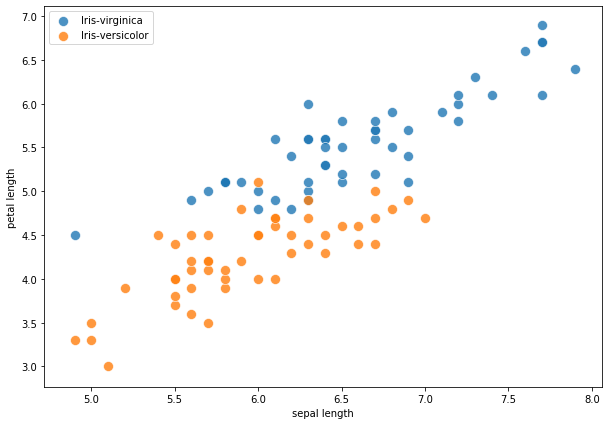

In [0]:
#@title Plot objects
plt.figure(figsize=(10, 7))
for clazz, data in zip(["Iris-virginica", "Iris-versicolor"], [class1, class2]):
    sns.scatterplot(data['sepal length'], data['petal length'], label=clazz, s=100, alpha=0.8)
plt.legend()
plt.show()

In [0]:
#@title Calculate metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = train[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = train['class']

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X, y)

X = test[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = test['class']

f = model.predict(X)
print(f"Accuracy: {accuracy_score(y, f)}")
print("Precision:")
for clazz, score in zip(model.classes_, precision_score(y, f, average=None)):
    print(f"    {clazz}: {score:.2f}")
print("Recall:")
for clazz, score in zip(model.classes_, recall_score(y, f, average=None)):
    print(f"    {clazz}: {score:.2f}")
print("F1-score:")
for clazz, score in zip(model.classes_, f1_score(y, f, average=None)):
    print(f"    {clazz}: {score:.2f}")

Accuracy: 0.92
Precision:
    Iris-versicolor: 0.96
    Iris-virginica: 0.89
Recall:
    Iris-versicolor: 0.88
    Iris-virginica: 0.96
F1-score:
    Iris-versicolor: 0.92
    Iris-virginica: 0.92


In [0]:
#@title Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, f))

[[22  3]
 [ 1 24]]


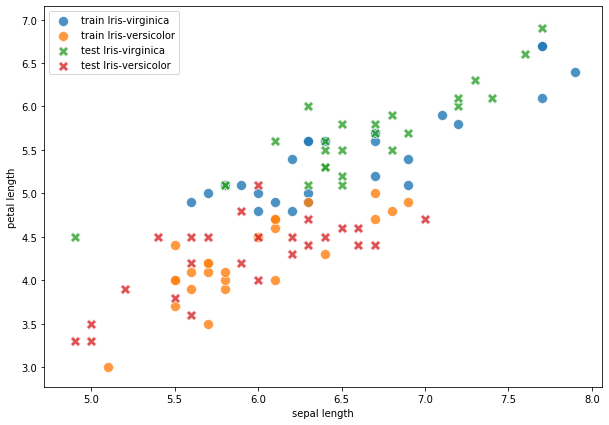

In [0]:
#@title Plot train and test sets
plt.figure(figsize=(10, 7))
for label, data in zip(["train", "test"], [train, test]):
    for clazz in ["Iris-virginica", "Iris-versicolor"]:
        tmp = data[data["class"] == clazz]
        if label == "test":
            sns.scatterplot(tmp['sepal length'], tmp['petal length'], label=f"{label} {clazz}", s=100, alpha=0.8, marker='X')
        else:
            sns.scatterplot(tmp['sepal length'], tmp['petal length'], label=f"{label} {clazz}", s=100, alpha=0.8)
plt.legend()
plt.show()